# Assignment 5

## Importing the libraries

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore") #Just so to ignore the matplotlib.pyplot stem warning

# Q5. 

Consider the following infinite non-periodic DT signal :

$x[n]$ is defined as : 

\begin{align}
x[n] = 
\begin{cases}
0 &  n < 0 \\
1 & 0 \leq n < a \\
0 & n \geq a
\end{cases}
\end{align}



## (a) DTFT $X(e^{j\omega})$ 

Hence, we know that $X(e^{j\omega})$ is given by :

\begin{equation}
X(e^{j\omega}) = e^{-j \omega \frac{a-1}{2}} \frac {sin(\frac{\omega a}{2})}{sin(\frac{\omega }{2})}
\end{equation}



Firstly, we define the signal with $a$ and the number of points for which we want the $p$ number of samples. This is followed by defining a function which gives us the DTFT of the signal.

In [ ]:
def get_signal(a,p): #gives signal x[n] as needed
  x = np.concatenate((np.ones((a,)),np.zeros((p-a,)))) 
  return x

def DTFT_x(a,w): #gives DTFT
  X = np.exp(-1j*w*(a-1)/2)*(np.sin(w*a/2)/np.sin(w/2))
  return X

##(b) DTFT for 10,000 points and $a=20$

Now, plotting the signal for 10,000 DTFT points and $a=20$

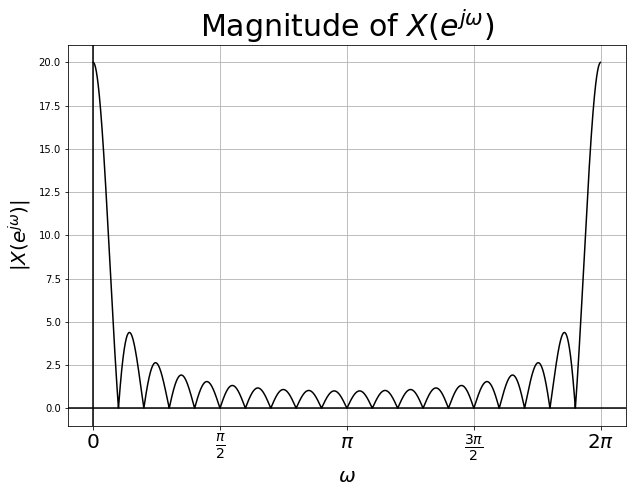

In [ ]:
p = 10000 #Number of points in DTFT
a = 20

w = np.linspace(0,6.28,p,endpoint=False) #defining w
x = get_signal(a,p)
X = np.abs(DTFT_x(a,w))

plt.figure(figsize = (10,7))
plt.title("Magnitude of $X(e^{j\omega})$",fontsize=30)
plt.plot(w,X,color = "k")
plt.grid()
plt.axhline(color="k")
plt.axvline(color="k")
plt.xlabel("$\omega$",fontsize=20)
plt.ylabel("$|X(e^{j\omega})|$",fontsize=20)
plt.xticks(ticks=[0,np.pi/2,np.pi,3*np.pi/2,2*np.pi],labels=[r"$0$",r"$\frac{\pi}{2}$",r"$\pi$",r"$\frac{3\pi}{2}$",r"$2\pi$"],fontsize=20)
plt.show()

## (c) DFT for N = 30

Now we define the function to generate finite sequence of length $N$, and returns the sequence, it's DFT Magnitude and the respective $\omega$ axis.

In [ ]:
def signal_extract(x,N):
  x1 = x[:N] #Takes the signal x generated in part (a) and gives out N samples
  w1 = np.linspace(0,6.28,N,endpoint=False)
  Mag_x1 = np.abs(np.fft.fft(x1)) 
  return x1,Mag_x1,w1

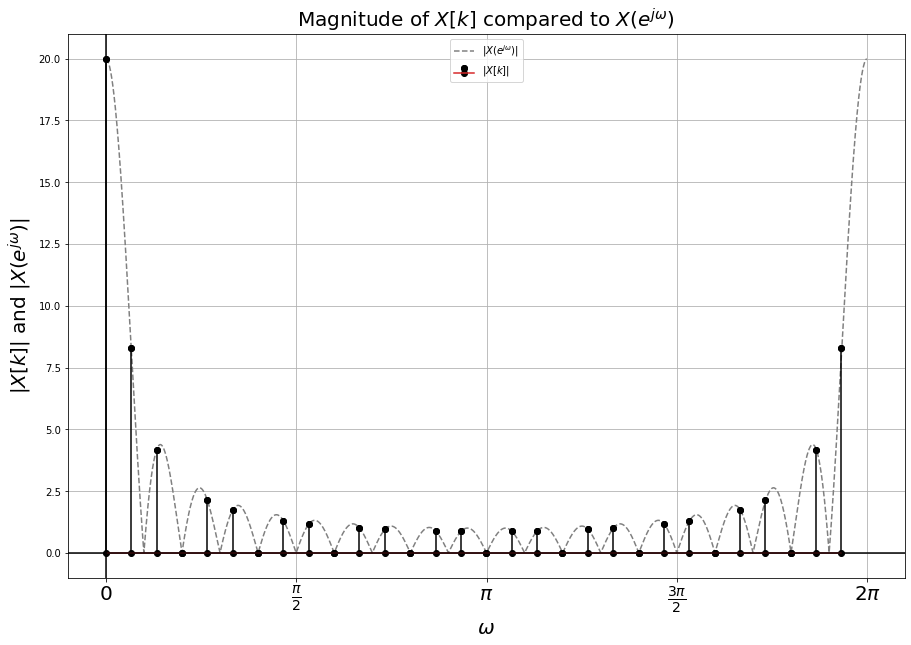

In [ ]:
N = 30

x1,Mag_x1,w1 = signal_extract(x,N)

plt.figure(figsize=(15,10))
plt.title("Magnitude of $X[k]$ compared to $X(e^{j\omega})$",fontsize=20)
plt.plot(w,X,color="gray",linestyle="dashed")
plt.stem(w1,Mag_x1,linefmt = "ko-",markerfmt="ko")
plt.grid()
plt.xlabel(r"$\omega$",fontsize=20)
plt.xticks(ticks=[0,np.pi/2,np.pi,3*np.pi/2,2*np.pi],labels=[r"$0$",r"$\frac{\pi}{2}$",r"$\pi$",r"$\frac{3\pi}{2}$",r"$2\pi$"],fontsize=20)
plt.ylabel("$|X[k]|$ and $|X(e^{j\omega})|$",fontsize=20)
plt.legend(["$|X(e^{j\omega})|$","$|X[k]|$"])
plt.axhline(color="k")
plt.axvline(color="k")
plt.show()


## (d) DFT for N = 50, 100, 1000 and Conclusion

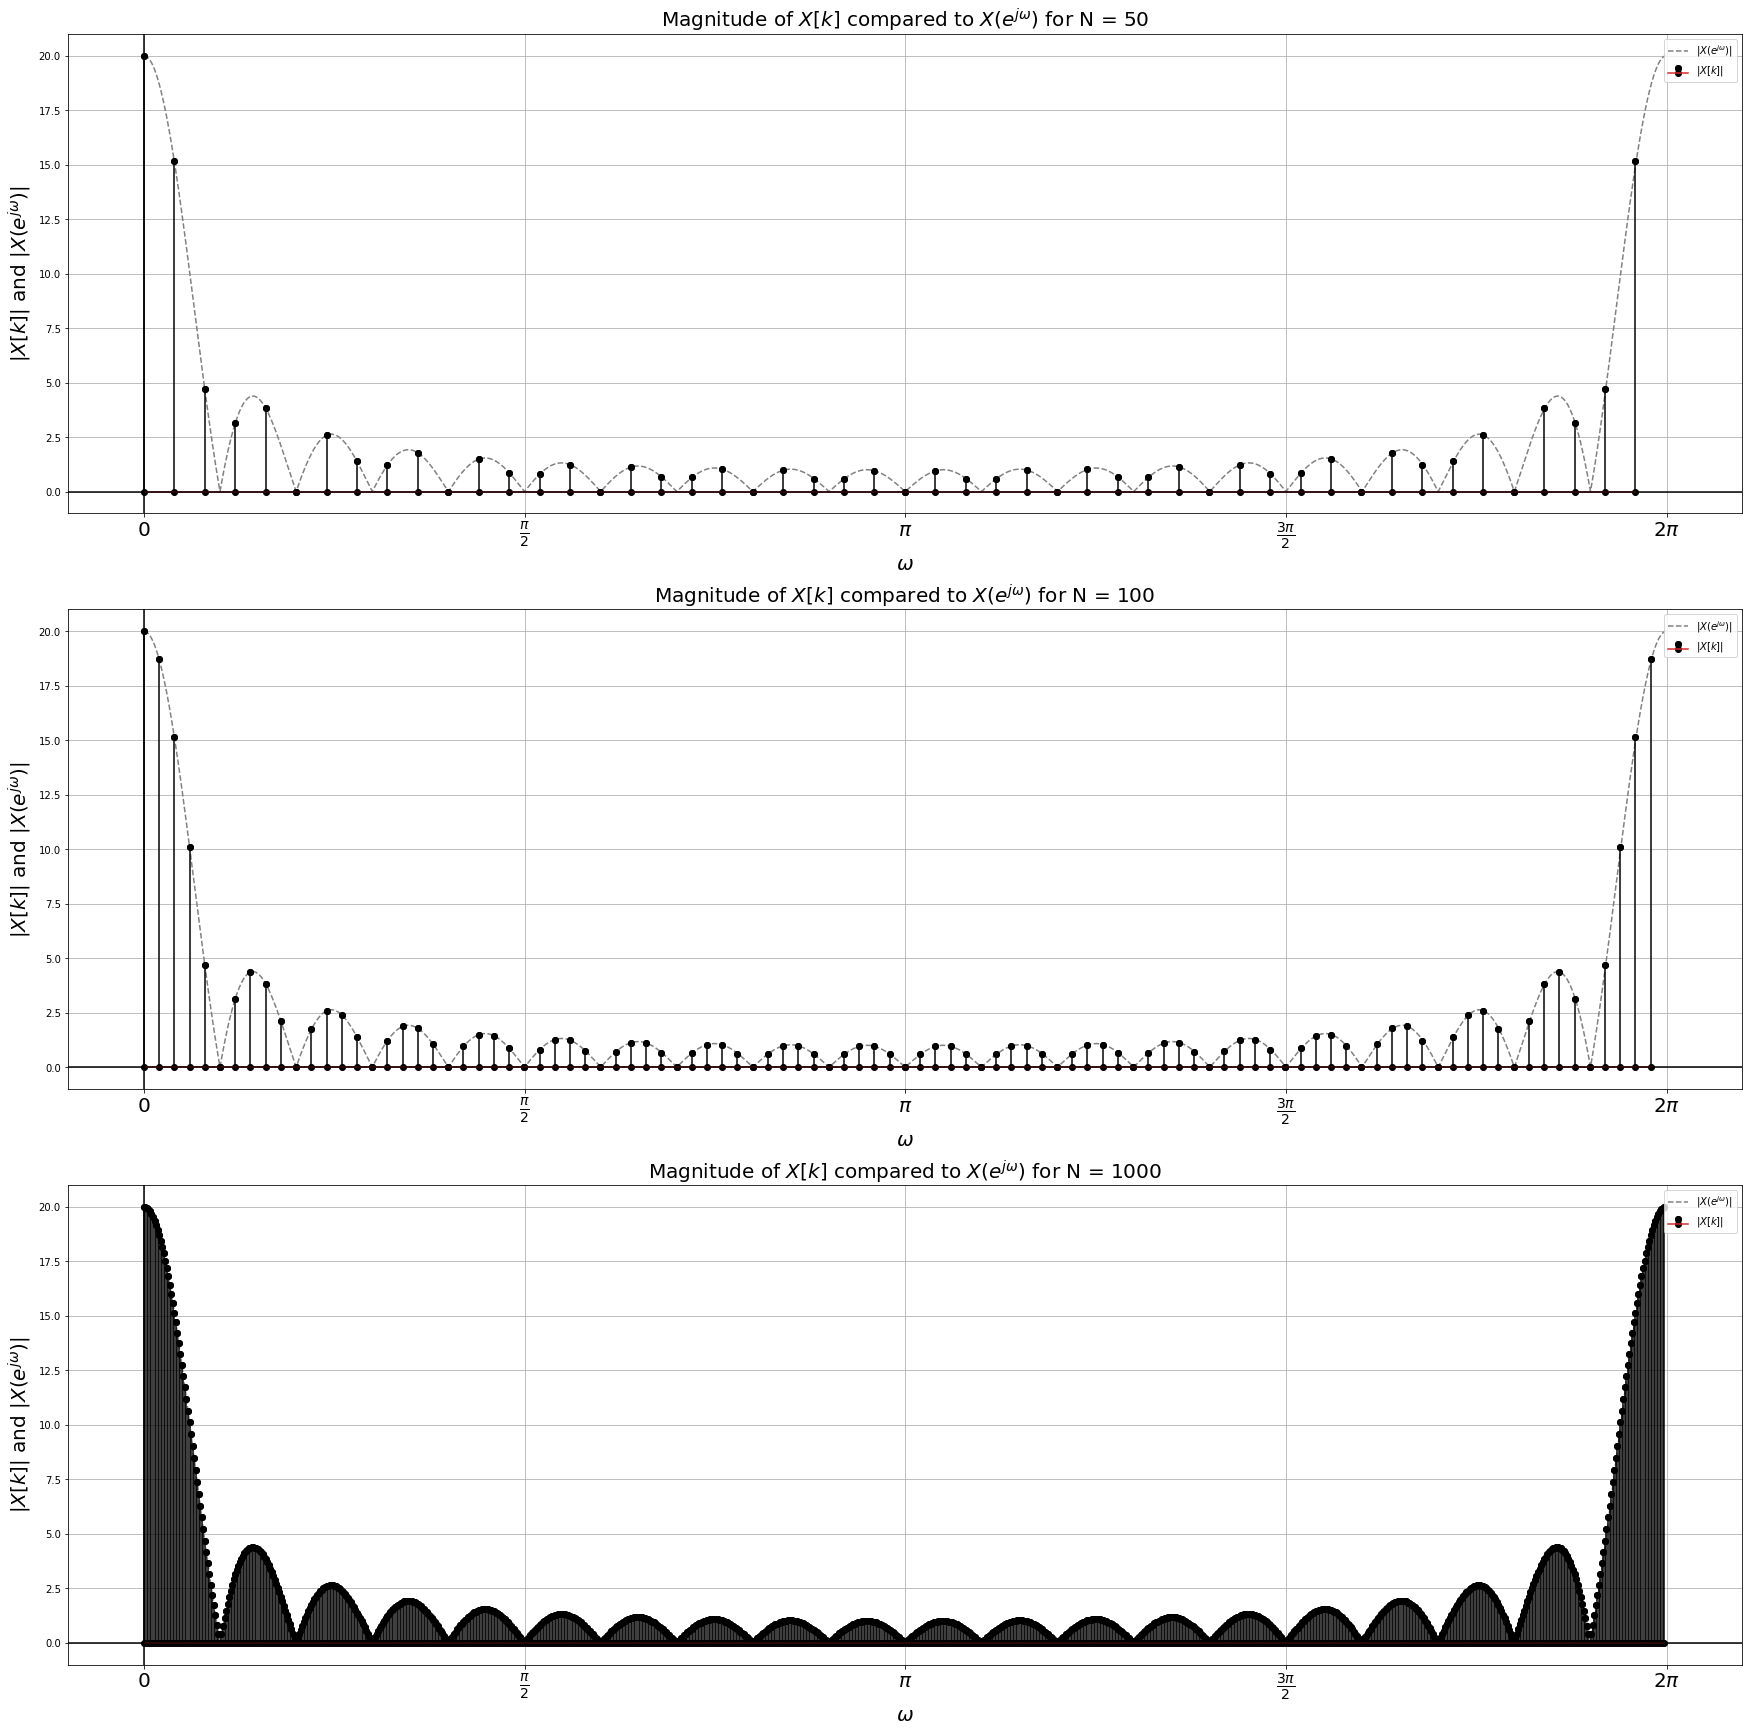

In [ ]:
x2,Mag_x2,w2 = signal_extract(x,50)
x3,Mag_x3,w3 = signal_extract(x,100)
x4,Mag_x4,w4 = signal_extract(x,1000)

figure = plt.figure(figsize = [30,30])
figure.add_subplot(3,1,1)

plt.title("Magnitude of $X[k]$ compared to $X(e^{j\omega})$ for N = 50",fontsize=20)
plt.plot(w,X,color="gray",linestyle="dashed")
plt.stem(w2,Mag_x2,linefmt = "ko-",markerfmt="ko")
plt.grid()
plt.xlabel(r"$\omega$",fontsize=20)
plt.xticks(ticks=[0,np.pi/2,np.pi,3*np.pi/2,2*np.pi],labels=[r"$0$",r"$\frac{\pi}{2}$",r"$\pi$",r"$\frac{3\pi}{2}$",r"$2\pi$"],fontsize=20)
plt.ylabel("$|X[k]|$ and $|X(e^{j\omega})|$",fontsize=20)
plt.legend(["$|X(e^{j\omega})|$","$|X[k]|$"],loc = 'upper right')
plt.axhline(color="k")
plt.axvline(color="k")

figure.add_subplot(3,1,2)

plt.title("Magnitude of $X[k]$ compared to $X(e^{j\omega})$ for N = 100",fontsize=20)
plt.plot(w,X,color="gray",linestyle="dashed")
plt.stem(w3,Mag_x3,linefmt = "ko-",markerfmt="ko")
plt.grid()
plt.xlabel(r"$\omega$",fontsize=20)
plt.xticks(ticks=[0,np.pi/2,np.pi,3*np.pi/2,2*np.pi],labels=[r"$0$",r"$\frac{\pi}{2}$",r"$\pi$",r"$\frac{3\pi}{2}$",r"$2\pi$"],fontsize=20)
plt.ylabel("$|X[k]|$ and $|X(e^{j\omega})|$",fontsize=20)
plt.legend(["$|X(e^{j\omega})|$","$|X[k]|$"],loc = 'upper right')
plt.axhline(color="k")
plt.axvline(color="k")

figure.add_subplot(3,1,3)
plt.title("Magnitude of $X[k]$ compared to $X(e^{j\omega})$ for N = 1000",fontsize=20)
plt.plot(w,X,color="gray",linestyle="dashed")
plt.stem(w4,Mag_x4,linefmt = "ko-",markerfmt="ko")
plt.grid()
plt.xlabel(r"$\omega$",fontsize=20)
plt.xticks(ticks=[0,np.pi/2,np.pi,3*np.pi/2,2*np.pi],labels=[r"$0$",r"$\frac{\pi}{2}$",r"$\pi$",r"$\frac{3\pi}{2}$",r"$2\pi$"],fontsize=20)
plt.ylabel("$|X[k]|$ and $|X(e^{j\omega})|$",fontsize=20)
plt.legend(["$|X(e^{j\omega})|$","$|X[k]|$"],loc = 'upper right')
plt.axhline(color="k")
plt.axvline(color="k")

plt.show()

Conclusion : As N increases, our DFT becomes more and more smooth and approaches closer to the DTFT. But this happens at the cost of increasing the size of original signal.

Thus zero padding the signal will increase the frequency resolution in DFT Magnitude spectrum.

#Q6.

The cosine generator function generates the signal $x(t)$ for given sampling frequency $f_s$ and also returns the Magnitude spectrum for $N$ point DFT 

In [ ]:
def cosine_generator(fs,N):

  t = np.linspace(0,1,fs,endpoint=False)

  x = np.cos(2*np.pi*3010*t)

  x = x[:N] 
  X = np.abs(np.fft.fft(x))
  return x,X

Calculating various N points DFT for different $f_s$

In [ ]:
x_1,X_1 = cosine_generator(20000,2000)
x_2,X_2 = cosine_generator(40000,4000)
x_3,X_3 = cosine_generator(20000,1000)

x_4,_ = cosine_generator(20000,1000) #Extracting the signal only 
x_4 = np.concatenate((x_4,np.zeros(1000,))) #Zero padding the signal with 1000 zeros as per the question
X_4 = np.abs(np.fft.fft(x_4)) #getting the Magnitude spectrum


## (a) $f_s = 20 kHz, N = 2000$

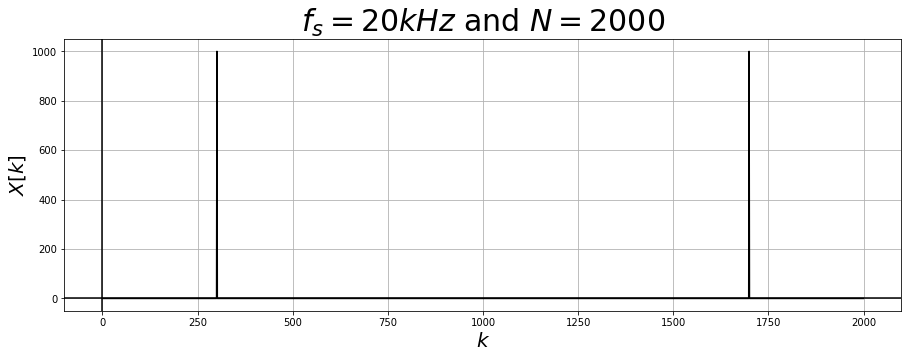

In [ ]:
plt.figure(figsize = (15,5))
plt.title(r"$f_s = 20 kHz$ and $N = 2000$",fontsize=30)
plt.plot(X_1,color="k")
plt.grid()
plt.axhline(color="k")
plt.axvline(color="k")
plt.xlabel("$k$",fontsize=20)
plt.ylabel("$X[k]$",fontsize=20)

plt.show()

## (b) $f_s = 40 kHz, N = 4000$

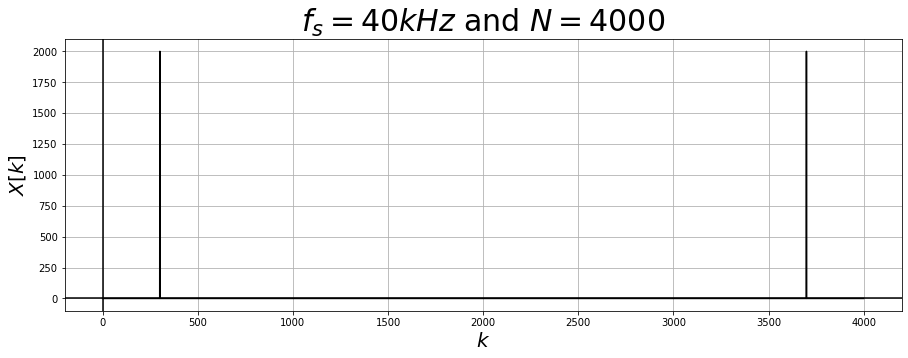

In [ ]:
plt.figure(figsize = (15,5))
plt.title(r"$f_s = 40 kHz$ and $N = 4000$",fontsize=30)
plt.plot(X_2,color="k")
plt.grid()
plt.axhline(color="k")
plt.axvline(color="k")
plt.xlabel("$k$",fontsize=20)
plt.ylabel("$X[k]$",fontsize=20)

plt.show()


## (c) $f_s = 20 kHz, N = 1000$

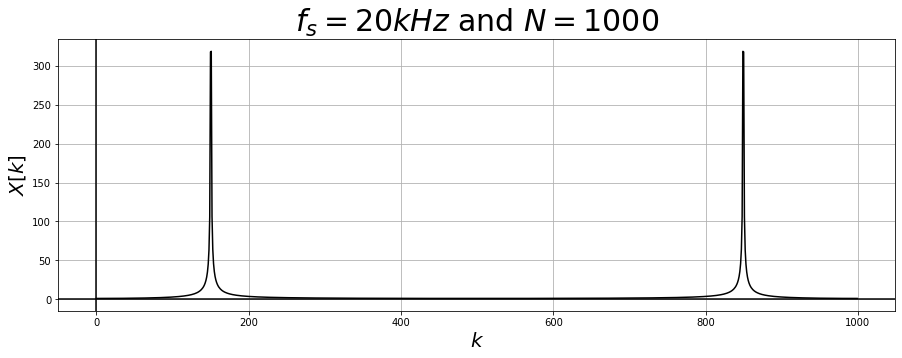

In [ ]:
plt.figure(figsize = (15,5))
plt.title(r"$f_s = 20 kHz$ and $N = 1000$",fontsize=30)
plt.plot(X_3,color="k")
plt.grid()
plt.axhline(color="k")
plt.axvline(color="k")
plt.xlabel("$k$",fontsize=20)
plt.ylabel("$X[k]$",fontsize=20)

plt.show()


## (d) $f_s = 20 kHz, N = 2000$ with zero padding.

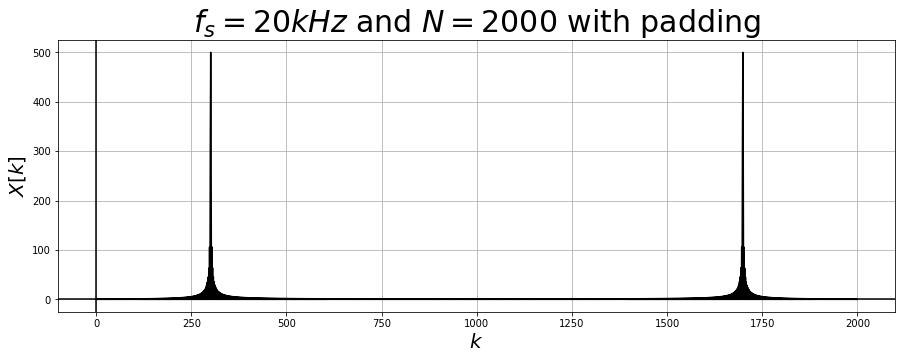

In [ ]:
plt.figure(figsize = (15,5))
plt.title(r"$f_s = 20 kHz$ and $N = 2000$ with padding",fontsize=30)
plt.plot(X_4,color="k")
plt.grid()
plt.axhline(color="k")
plt.axvline(color="k")
plt.xlabel("$k$",fontsize=20)
plt.ylabel("$X[k]$",fontsize=20)

plt.show()
